In [361]:
import json
import pandas as pd
import numpy as np
import os
import re
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [376]:
left_eye = []
right_eye = []
nose = []
neck = []
root_of_tail = []
left_shoulder = []
left_elbow = []
left_front_paw = []
right_shoulder = []
right_elbow = []
right_front_paw = []
left_hip = []
left_knee = []
left_back_paw = []
right_hip = []
right_knee = []
right_back_paw = []

In [377]:
# get prediction coordinates, append them to their respective list
p = open('preds.json')
preds_list = json.load(p)
preds_list[1]
keypoints = []
ids = []

for d in preds_list:
    for i, p in zip(d['image_paths'], d['preds']):
        m = i.split('/')[3]

        # m = re.search('(.+?)_\d_', m)
        # m = m.group(1)

        m = m.split('_')
        m = m[0] + m[1] + m[2] + m[3]

        id = int(m)
       
        keypoints.append((id, p))
        ids.append(id)
        left_eye.append((p[0][0], p[0][1]))
        right_eye.append((p[1][0], p[1][1]))
        nose.append((p[2][0], p[2][1]))
        neck.append((p[3][0], p[3][1]))
        root_of_tail.append((p[4][0], p[4][1]))
        left_shoulder.append((p[5][0], p[5][1]))
        left_elbow.append((p[6][0], p[6][1]))
        left_front_paw.append((p[7][0], p[7][1]))
        right_shoulder.append((p[8][0], p[8][1]))
        right_elbow.append((p[9][0], p[9][1]))
        right_front_paw.append((p[10][0], p[10][1]))
        left_hip.append((p[11][0], p[11][1]))
        left_knee.append((p[12][0], p[12][1]))
        left_back_paw.append((p[13][0], p[13][1]))
        right_hip.append((p[14][0], p[14][1]))
        right_knee.append((p[15][0], p[15][1]))
        right_back_paw.append((p[16][0], p[16][1]))

        

15710687400635837
15713822400668705
15744349800540501
15741000000482107
15744204000515701
15745390800008401
15740820000290201
15710615400843910
15744204000507107
15712237200253207
15710615400843907
15714069000028900
15745390800517017
15710363400057507
15712559400028917
15740892000192301
15710687400026001
15744131400858300
15745390800517000
15744386400030307
15710687400291307
15744131400262127
15712559400074801
15742728000274305
15713999400085907
15742620000345301
15710687400291310
15744386400030310
15744170400643407
15710652000056701
15744386400143000
15744273000373817
15744386400781717
15711624000206701
15744456000619515
15744273000373800
15744386400781700
15740928000574701
15742620000106507
15712237200271105
15710831400313125
15713822400762100
15744456000523507
15740892000590107
15710687400292901
15744456000636320
15713893200006507
15713964000447907
15713893200104005
15742728000312405
15742404000628500
15740892000590110
15710831400391905
15710652000026801
15742728000341805
1574092800

In [378]:
# combine the lists into a dictionary
key_dict = {'id': ids, 
'left_eye': left_eye, 
'right_eye': right_eye, 
'nose': nose,
'neck': neck,
'root_of_tail': root_of_tail,
'left_shoulder': left_shoulder,
'left_elbow': left_elbow,
'left_front_paw': left_front_paw,
'right_shoulder': right_shoulder,
'right_elbow': right_elbow,
'right_front_paw': right_front_paw,
'left_hip': left_hip,
'left_knee': left_knee,
'left_back_paw': left_back_paw,
'right_hip': right_hip,
'right_knee': right_knee,
'right_back_paw': right_back_paw}


In [379]:
# check if lengths are all the same
for k, v in key_dict.items():
    print(len(v))

1090
1090
1090
1090
1090
1090
1090
1090
1090
1090
1090
1090
1090
1090
1090
1090
1090
1090


In [380]:
# make dict to dataframe
keys = pd.DataFrame().from_dict(key_dict)
keys.shape

(1090, 18)

In [421]:
coords = pd.read_csv('coordinates.csv')
for i, row in coords.iterrows():
    m = row["filename"].split('_')
    
   
    id = m[0]+m[1]+m[2]+m[3]
    # print(id)
    coords.loc[i,'id'] = int(id)
   

In [422]:
len(set(coords.id.to_list()))

1090

In [423]:
coords.shape

(1090, 6)

In [424]:
# merge bounding box coordinates and keypoint prediction tuples 
coords_full = pd.merge(coords, keys, how = "inner", on="id")

In [425]:
coords_full.shape

(1090, 23)

In [426]:
coords_full

,filename,left,top,width,height,id,left_eye,right_eye,nose,neck,...,left_front_paw,right_shoulder,right_elbow,right_front_paw,left_hip,left_knee,left_back_paw,right_hip,right_knee,right_back_paw
0,1571054340_00028_0_1_cropped.jpg,1099,0,257,102,15710543400002801,"(1280.75, 54.25)","(1268.25, 44.25)","(1263.25, 71.75)","(1205.75, 11.75)",...,"(1245.75, 81.75)","(1173.25, 16.75)","(1190.75, 59.25)","(1200.75, 99.25001525878906)","(1295.75, 29.25)","(1305.75, 31.75)","(1300.75, 64.25)","(1278.25, 49.25)","(1173.25, 29.25)","(1193.25, 84.25)"
1,1571054340_00029_0_1_cropped.jpg,1099,0,258,103,15710543400002901,"(1291.4990234375, 59.7841796875)","(1273.9306640625, 49.7451171875)","(1263.8916015625, 72.3330078125)","(1266.4013671875, 12.0986328125)",...,"(1256.3623046875, 72.3330078125)","(1173.5400390625, 22.1376953125)","(1191.1083984375, 62.2939453125)","(1196.1279296875, 94.9208984375)","(1299.0283203125, 19.6279296875)","(1306.5576171875, 34.6865234375)","(1304.0478515625, 57.2744140625)","(1178.5595703125, 32.1767578125)","(1186.0888671875, 57.2744140625)","(1193.6181640625, 84.8818359375)"
2,1571054340_00064_0_1_cropped.jpg,1107,0,245,110,15710543400006401,"(1301.67578125, 62.83984375)","(1280.23046875, 46.16015625)","(1275.46484375, 77.13671875)","(1265.93359375, 17.56640625)",...,"(1192.06640625, 89.05078125)","(1177.76953125, 17.56640625)","(1261.16796875, 65.22265625)","(1199.21484375, 96.19921875)","(1292.14453125, 36.62890625)","(1311.20703125, 31.86328125)","(1187.30078125, 86.66796875)","(1120.58203125, -25.32422637939453)","(1170.62109375, 12.800765991210938)","(1199.21484375, 91.43359375)"
3,1571054340_00250_0_1_cropped.jpg,1107,0,250,109,15710543400025001,"(1278.9169921875, 43.0576171875)","(1303.2333984375, 50.3525390625)","(1293.5068359375, 81.9638671875)","(1240.0107421875, 13.8779296875)",...,"(1218.1259765625, 81.9638671875)","(1201.1044921875, 18.7412109375)","(1210.8310546875, 52.7841796875)","(1213.2626953125, 86.8271484375)","(1210.8310546875, 35.7626953125)","(1198.6728515625, 52.7841796875)","(1188.9462890625, 79.5322265625)","(1120.8603515625, -27.4599609375)","(1196.2412109375, 52.7841796875)","(1186.5146484375, 81.9638671875)"
4,1571054340_00361_0_1_cropped.jpg,1108,0,242,101,15710543400036101,"(1309.6962890625, 60.5908203125)","(1290.8681640625, 55.8837890625)","(1288.5146484375, 84.1259765625)","(1297.9287109375, 20.5810546875)",...,"(1217.9091796875, 88.8330078125)","(1196.7275390625, 15.8740234375)","(1210.8486328125, 55.8837890625)","(1217.9091796875, 86.4794921875)","(1119.0615234375, -19.4287109375)","(1194.3740234375, 18.2275390625)","(1116.7080078125, 55.8837890625)","(1121.4150390625, -19.4287109375)","(1189.6669921875, 8.8134765625)","(1121.4150390625, 58.2373046875)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1571061540_02006_0_0_cropped.jpg,116,396,436,566,15710615400200600,"(419.0224609375, 510.2138671875)","(413.5048828125, 510.2138671875)","(435.5751953125, 532.2841796875)","(336.2587890625, 548.8369140625)",...,"(396.9521484375, 918.5146484375)","(264.5302734375, 659.1884765625)","(374.8818359375, 775.0576171875)","(363.8466796875, 835.7509765625)","(214.8720703125, 879.8916015625)","(187.2841796875, 912.9970703125)","(396.9521484375, 918.5146484375)","(253.4951171875, 885.4091796875)","(242.4599609375, 929.5498046875)","(396.9521484375, 918.5146484375)"
1086,1571061540_01952_0_0_cropped.jpg,130,401,419,554,15710615400195200,"(422.7060241699219, 512.7880859375)","(411.9052429199219, 507.3876647949219)","(433.5068054199219, 539.7900390625)","(341.7001647949219, 518.1884765625)",...,"(401.1044616699219, 917.8173828125)","(271.4950866699219, 663.9990234375)","(363.3017272949219, 793.6083984375)","(368.7021179199219, 836.8115234375)","(428.1064147949219, 734.2041015625)","(471.3095397949219, 939.4189453125)","(395.7040710449219, 934.0185546875)","(330.8993835449219, 772.0068359375)","(465.9091491699219, 923.2177734375)","(401.1044616699219,

In [427]:
# create csv of the merged data frame
coords_full.to_csv("coords_with_keypoints.csv")

# Visualization

In [443]:
p = '1571410980_00969_0_0_superimposed.jpg'
image = 'data/' + p
m = image.split('/')[1]
m = m.split('_')
m = m[0] + m[1] + m[2] + m[3]
print(m)
# m = re.search('(.+?)_\d_', m)
# m = m.group(1)
# m = m.split('_')
# m = m[0] + m[1] + m[2]
# # print(m)
m = int(m)
points = coords_full[coords_full.id == m].iloc[:,6:].values[0]

img = mpimg.imread(image)

15714109800096900


In [444]:
x = [i[0] for i in points]
y = [i[1] for i in points]

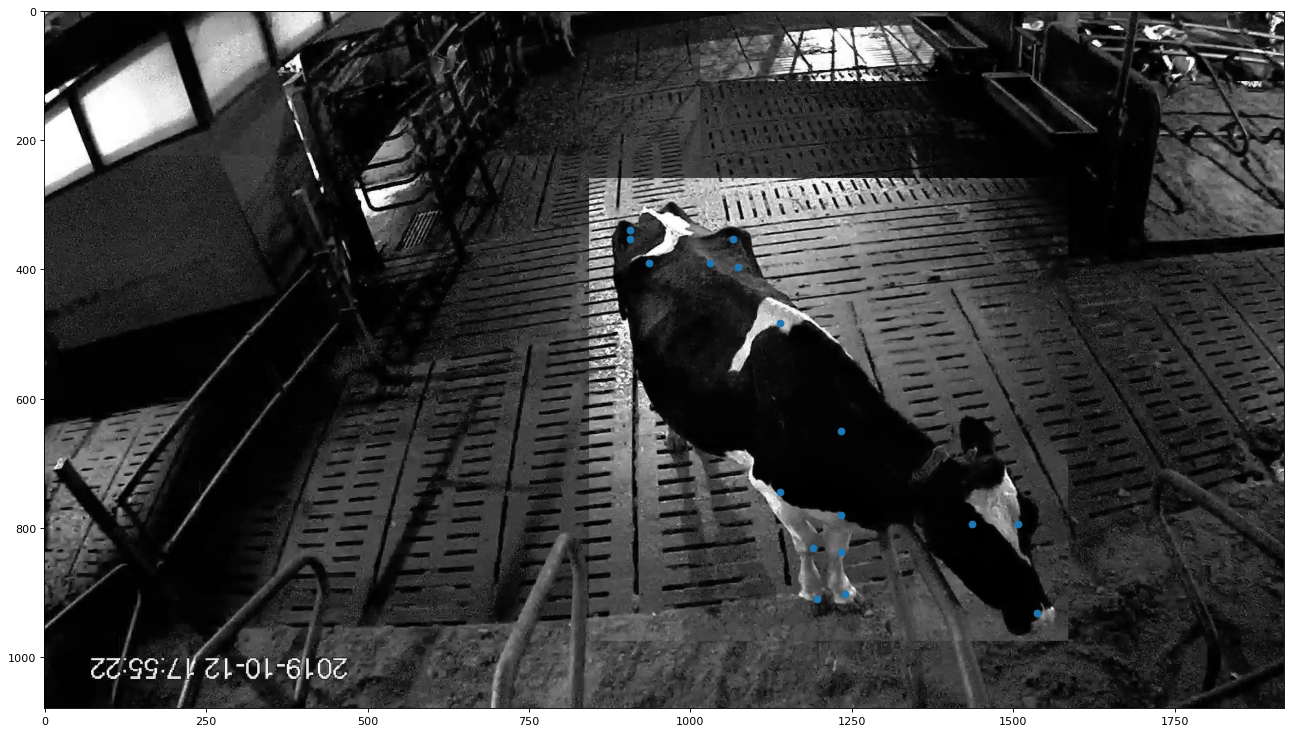

In [445]:
figure(figsize=(20, 20), dpi=80)
plt.imshow(img)
plt.scatter(x,y)